In [29]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay

In [4]:
h_disease = fetch_ucirepo(id=45) 
df = pd.read_csv(h_disease.metadata.data_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df = df.dropna()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<Axes: xlabel='num', ylabel='count'>

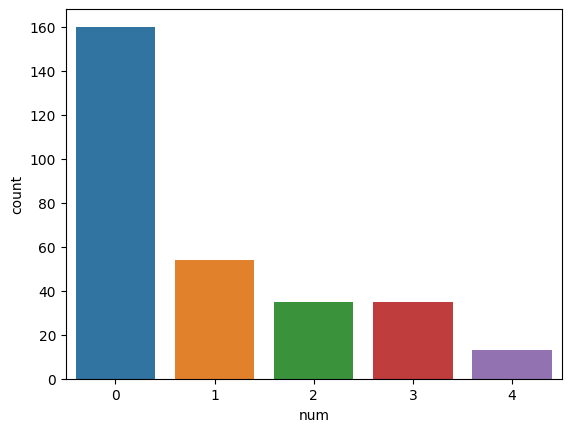

In [7]:
sns.countplot(data=df,x='num')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

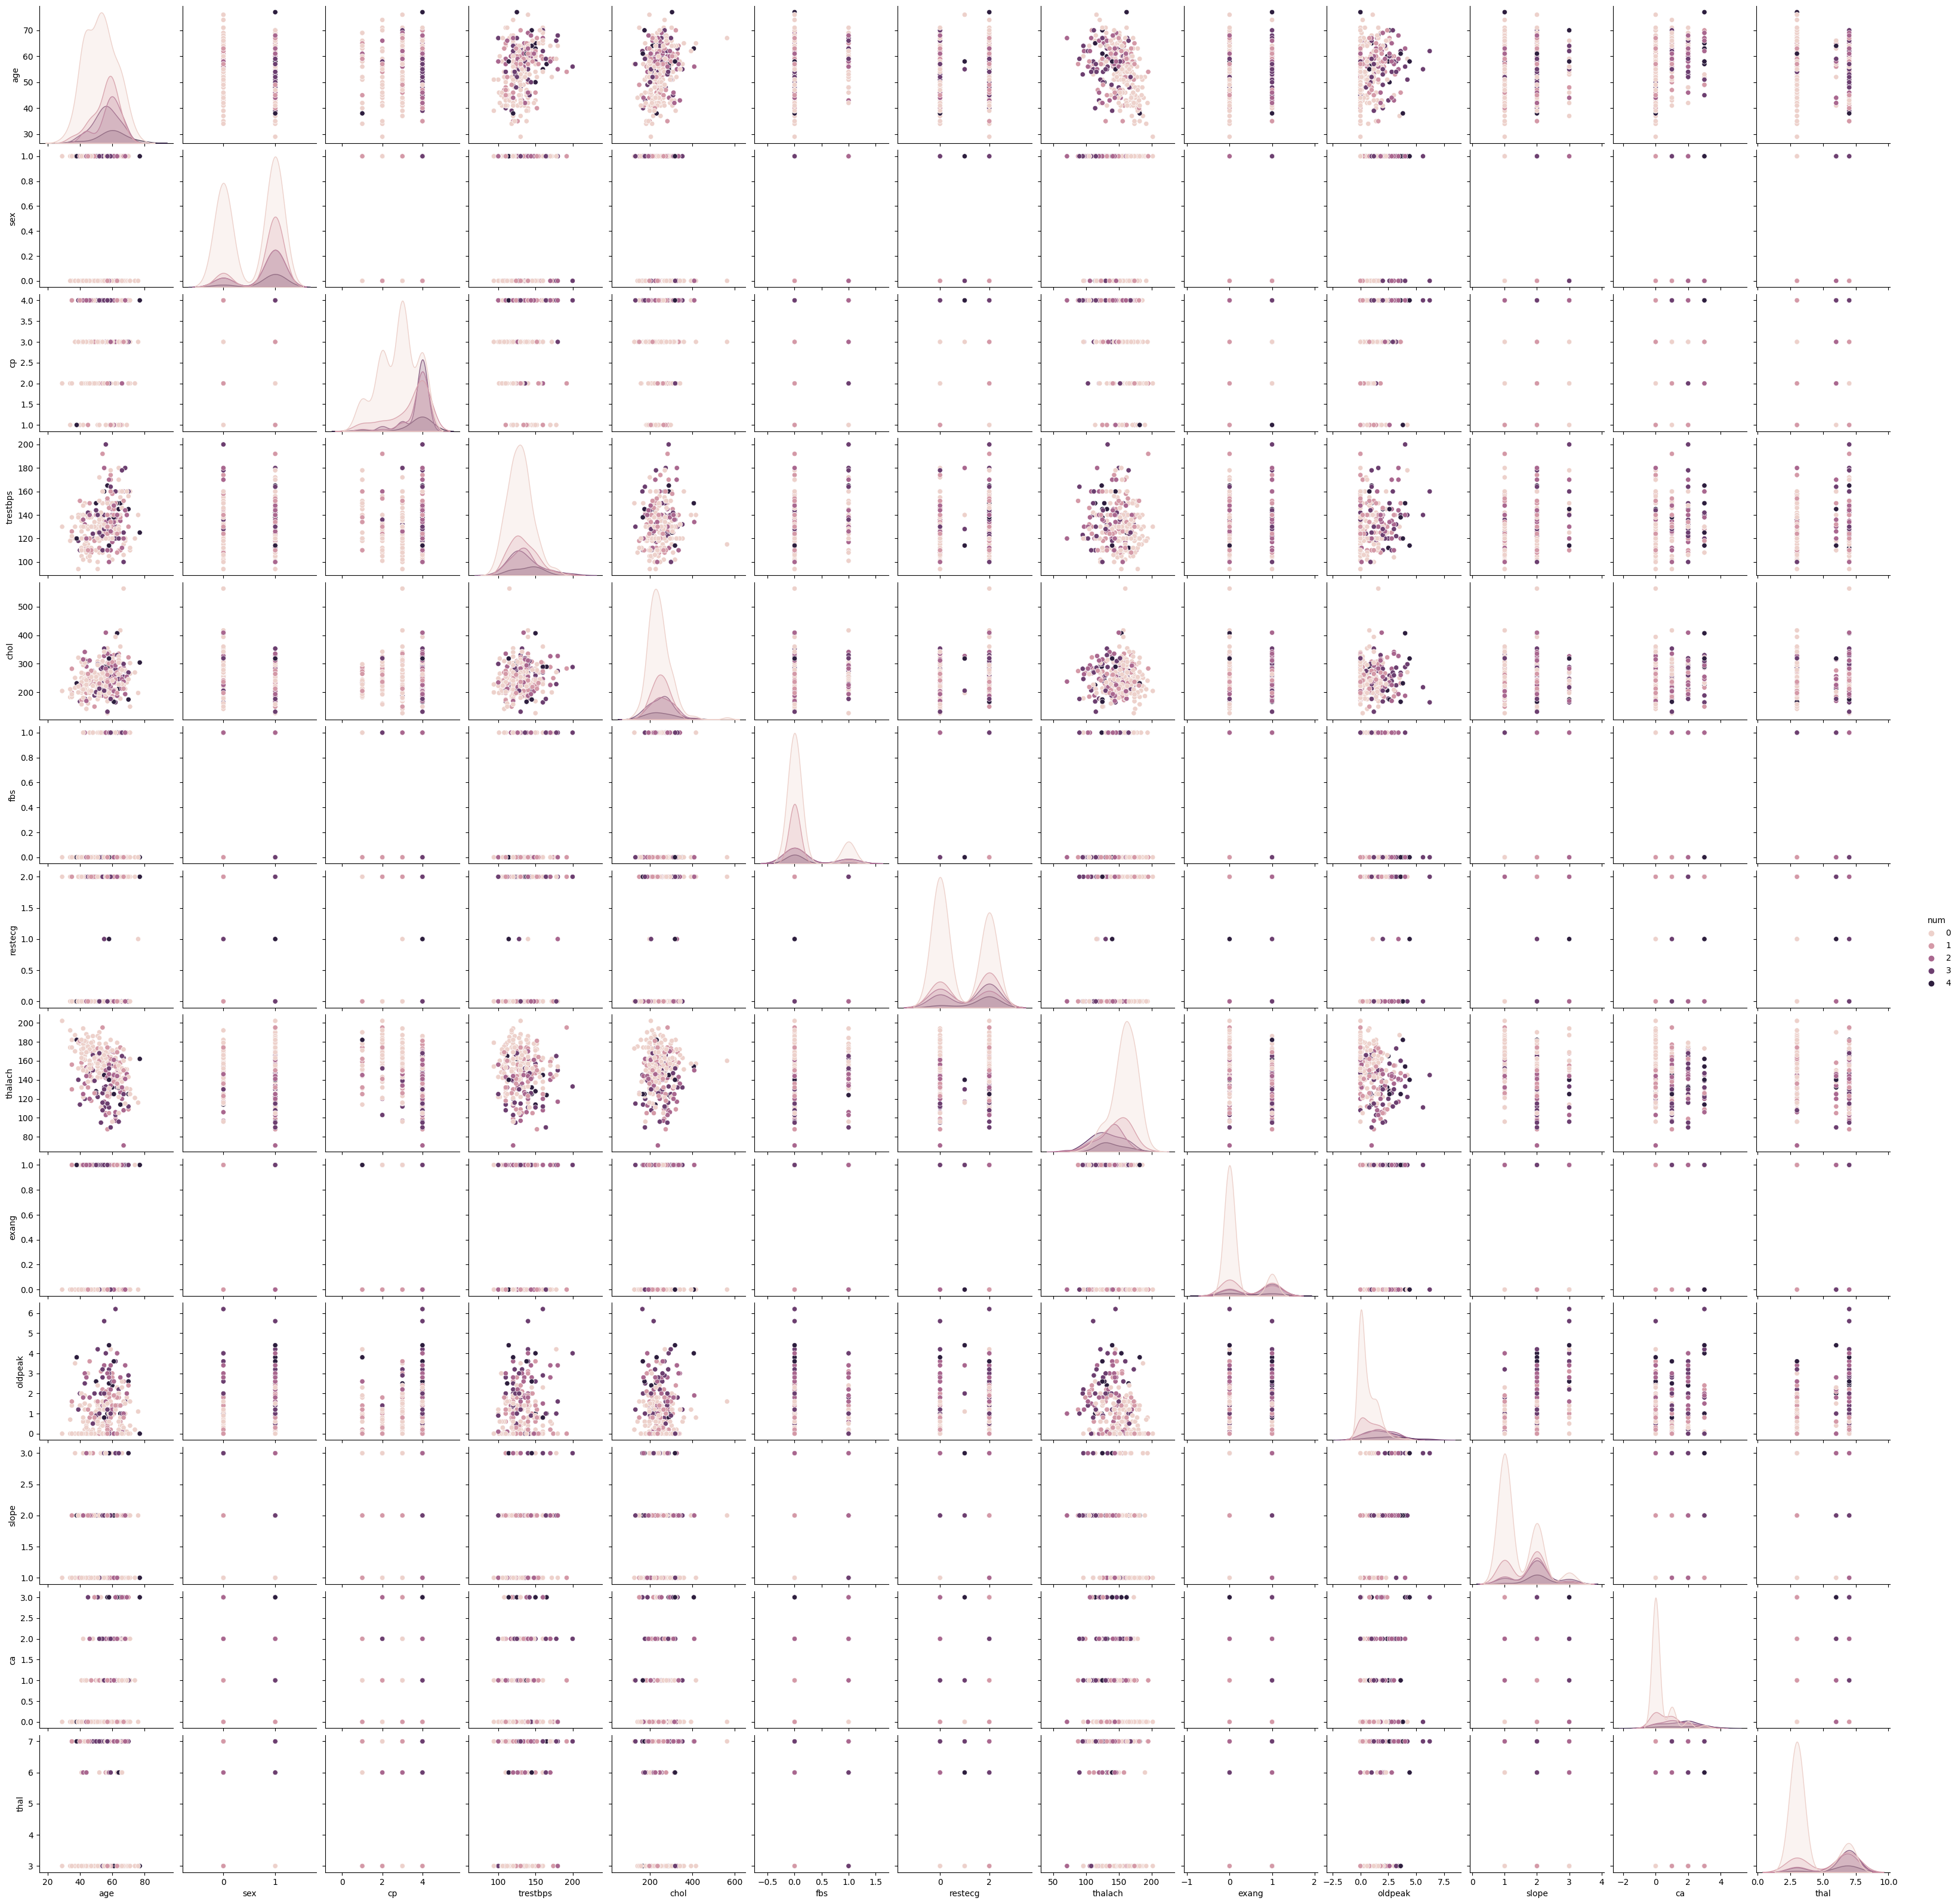

In [8]:
sns.pairplot(df,hue='num')

<Axes: >

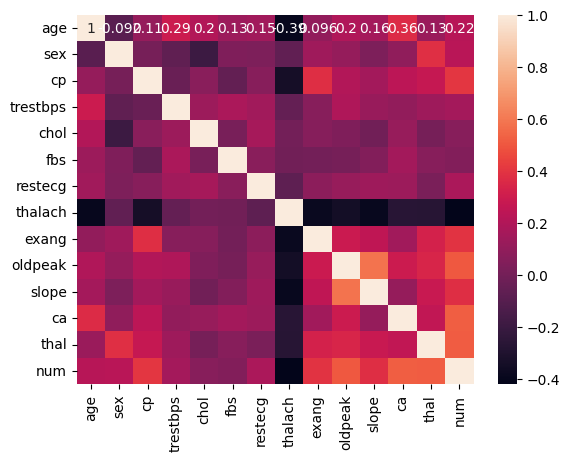

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
X = df.drop('num',axis=1).fillna(0)
y = df['num']

In [12]:
# train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)
coef = list(log_model.coef_[0])
coef

[0.03808063100002569,
 -0.38533261157544085,
 -0.5575931794364685,
 -0.2881417076496303,
 -0.06666546425910519,
 0.2762891174326401,
 -0.28265799924991025,
 0.390177384980266,
 -0.3488095471832297,
 -0.39217945122266684,
 -0.3044643836463012,
 -0.9405674218153418,
 -0.6793528918504955]

In [14]:
names = list(df.columns)
OR = {}
for key in names:
    for value in coef:
        OR[key] = value
        coef.remove(value)
        break
OR

{'age': 0.03808063100002569,
 'sex': -0.38533261157544085,
 'cp': -0.5575931794364685,
 'trestbps': -0.2881417076496303,
 'chol': -0.06666546425910519,
 'fbs': 0.2762891174326401,
 'restecg': -0.28265799924991025,
 'thalach': 0.390177384980266,
 'exang': -0.3488095471832297,
 'oldpeak': -0.39217945122266684,
 'slope': -0.3044643836463012,
 'ca': -0.9405674218153418,
 'thal': -0.6793528918504955}

This means:
* We can expect the **odds** of num to **decrease** per unit increase of age.
* We can expect the **odds** of num to **decrease** per unit increase of cp.
* We can expect the **odds** of num to **decrease** per unit increase of trestbps.
* We can expect the **odds** of num to **decrease** per unit increase of chol.
* We can expect the **odds** of num to **increase** per unit increase of fbs.
* We can expect the **odds** of num to **decrease** per unit increase of restecg.
* We can expect the **odds** of num to **increase** per unit increase of thalach.
* We can expect the **odds** of num to **decrease** per unit increase of exang.
* We can expect the **odds** of num to **decrease** per unit increase of oldpeak.
* We can expect the **odds** of num to **decrease** per unit increase of slope.
* We can expect the **odds** of num to **decrease** per unit increase of ca.
* We can expect the **odds** of num to **decrease** per unit increase of thal.
* Based on the ratios with each other, the maximum heart rate (thalach) indicator is a stronger predictor, even if it has a weak correlation coefficient.

In [15]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.6333333333333333

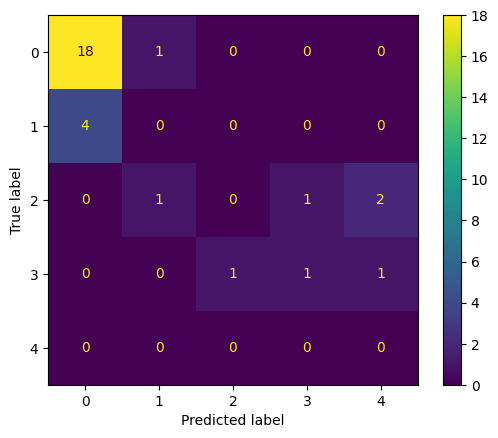

In [16]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

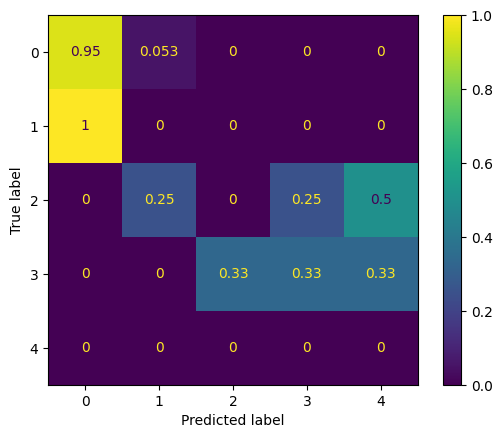

In [19]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         0

    accuracy                           0.63        30
   macro avg       0.26      0.26      0.26        30
weighted avg       0.57      0.63      0.60        30



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[1.88872271e-21, 1.43057898e-13, 9.99394916e-14, 4.66016344e-64,
        1.00000000e+00]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


<Figure size 1500x1000 with 0 Axes>

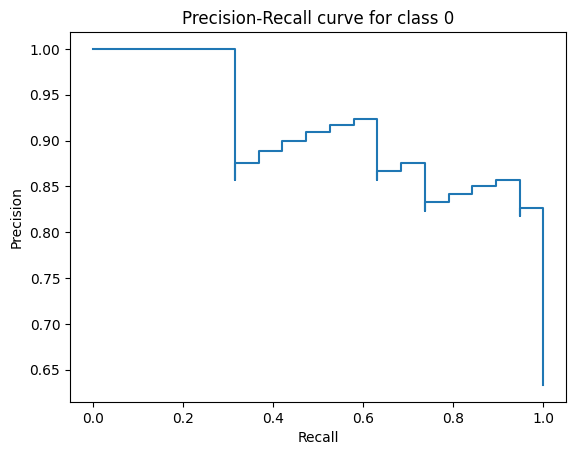

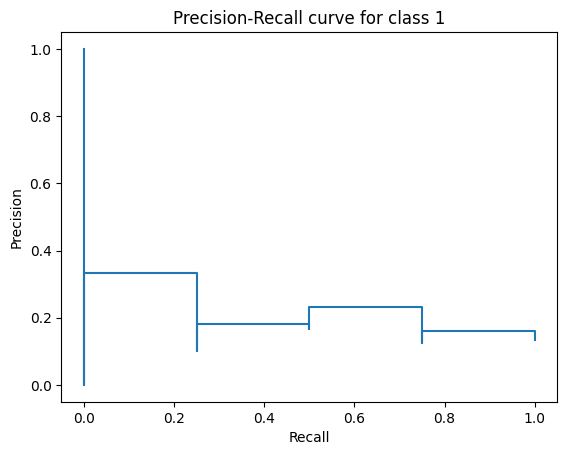

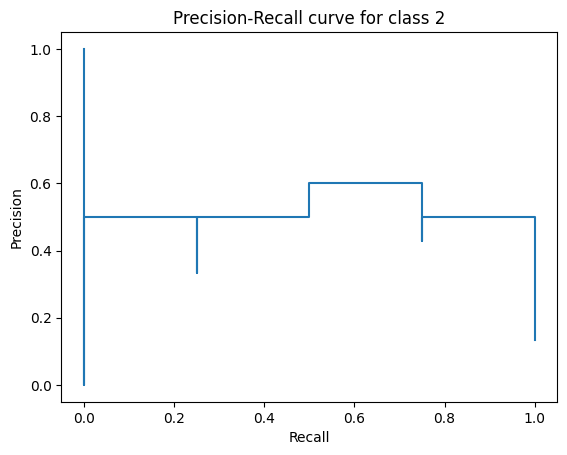

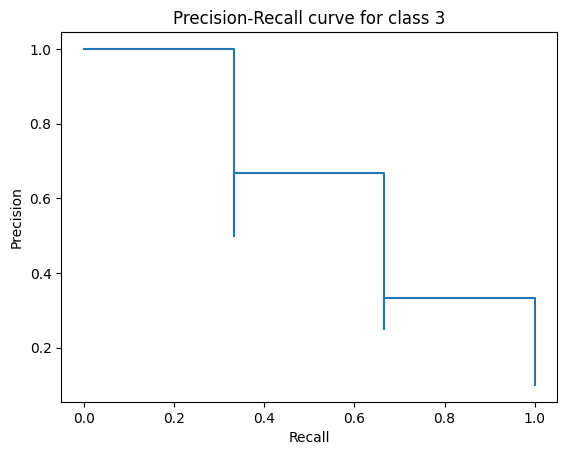

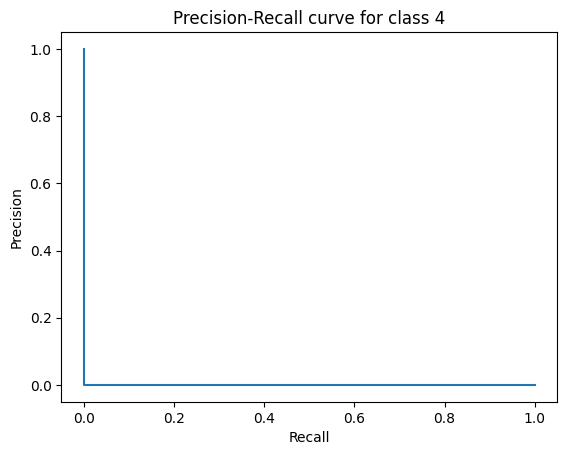

In [24]:
# binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_binarized.shape[1]

# predict probabilities
y_score = log_model.predict_proba(scaled_X_test)

# plot Precision-Recall curve for each class
plt.figure(figsize=(15, 10))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f'Precision-Recall curve for class {i}')

plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


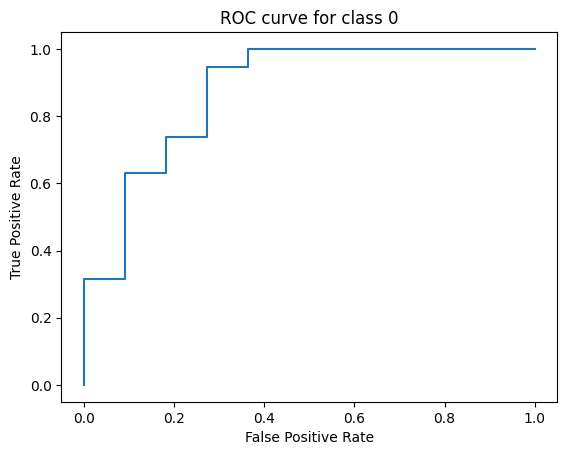

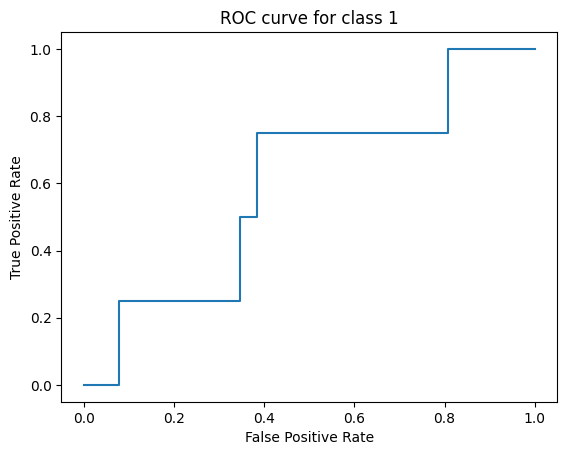

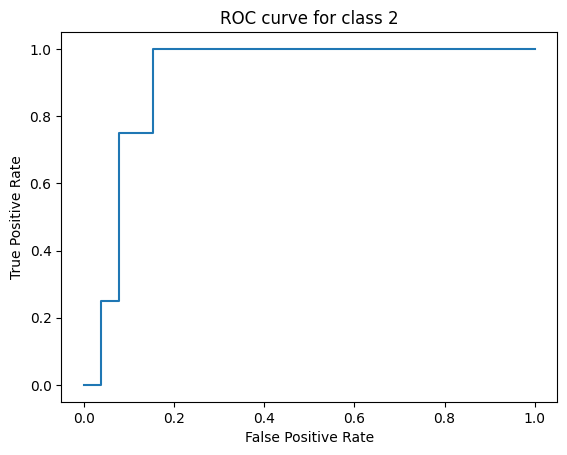

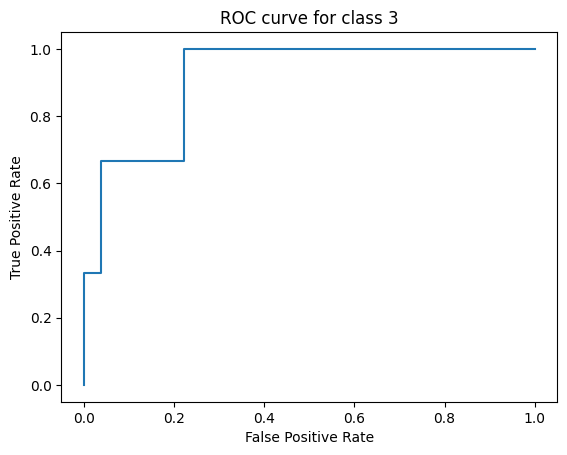

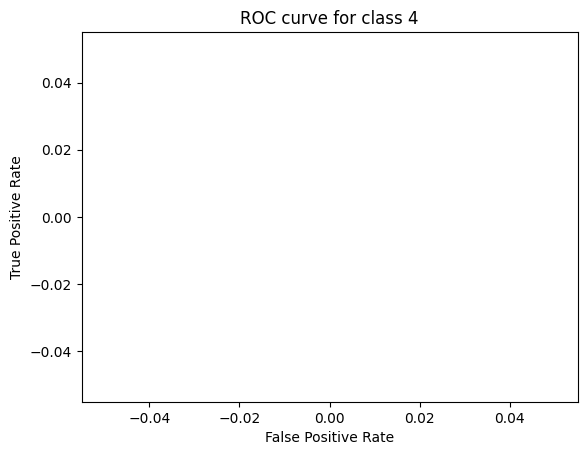

In [30]:
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.title(f'ROC curve for class {i}')